<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično reševanje diferencialnih enačb - robni problem</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Oktober 2017</font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Reševanje-dvotočkovnih-robnih-problemov" data-toc-modified-id="Reševanje-dvotočkovnih-robnih-problemov-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reševanje dvotočkovnih robnih problemov</a></div><div class="lev1 toc-item"><a href="#Strelska-metoda" data-toc-modified-id="Strelska-metoda-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strelska metoda</a></div><div class="lev2 toc-item"><a href="#Numerični-zgled:-poševni-met" data-toc-modified-id="Numerični-zgled:-poševni-met-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerični zgled: poševni met</a></div><div class="lev2 toc-item"><a href="#Numerični-zgled:-nosilec-z-obremenitvijo" data-toc-modified-id="Numerični-zgled:-nosilec-z-obremenitvijo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Numerični zgled: nosilec z obremenitvijo</a></div><div class="lev1 toc-item"><a href="#Metoda-končnih-razlik" data-toc-modified-id="Metoda-končnih-razlik-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda končnih razlik</a></div><div class="lev2 toc-item"><a href="#Numerični-zgled:-vertikalni-met" data-toc-modified-id="Numerični-zgled:-vertikalni-met-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerični zgled: vertikalni met</a></div><div class="lev2 toc-item"><a href="#Numerični-zgled:-nosilec-z-obremenitvijo" data-toc-modified-id="Numerični-zgled:-nosilec-z-obremenitvijo-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numerični zgled: nosilec z obremenitvijo</a></div><div class="lev1 toc-item"><a href="#Dodatno:-simbolna-rešitev-nosilca" data-toc-modified-id="Dodatno:-simbolna-rešitev-nosilca-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dodatno: simbolna rešitev nosilca</a></div>

# Reševanje dvotočkovnih robnih problemov

Pod dvotočkovnim robnim problemom razumemo navadno diferencialno enačbo drugega reda oblike:

$$\ddot y=f(t, y, \dot y),$$

ob predpisanih *robnih pogojih*:

$$y(a)=\alpha\qquad\textrm{in}\qquad y(b)=\beta.$$

Metode, ki smo jih spoznali pri reševanju *začetnih problemov*, tukaj neposredno niso uporabne, ker nimamo podanega odvoda v začetni točki pri $t=a$.

V nadaljevanju si bomo pogledali dva različna pristopa k reševanju robnih problemov:

1. t.i. **strelska metoda**
2. **metoda končnih razlik**.

# Strelska metoda

Rešujemo robni problem:

$$\ddot y=f(t, y, \dot y),\qquad y(a)=\alpha,\quad y(b)=\beta,$$

ki ga prevedemo na začetni problem tako, da si izberemo:

$$\dot y (a)=u.$$

Problem rešimo z numeričnimi metodami reševanja začetnega problema in rešitev označimo z $\theta(u, t)$.

Robni problem ima rešitev, ko smo izbrali $u$ tako, da velja:

$$r(u)=\theta(u,b)-\beta=0.$$

Dobili smo nelinearno enačbo, ki jo moramo rešiti; za izračun vrednosti mejnih preostankov $r(u)$ moramo numerično rešiti začetni problem.

Za rešitev enačbe $r(u)=0$ lahko uporabimo sekantno metodo. Izberemo $u_0$ in $u_1$ in na $i$-tem koraku izračunamo:

$$u_{i+1}=u_i-r(u_i)\,\frac{u_{i}-u_{i-1}}{r(u_{i})-r(u_{i-1})},\qquad i=2,3,\dots$$

Zaključimo, ko je:
$$\left|r(u_{i+1})\right|<\epsilon.$$

Rešitev strelske metode je obremenjena z napako metode reševanja nelinearne enačbe $\epsilon$ in z napako numerične metode za reševanje začetnega problema.

## Numerični zgled: poševni met

Na sliki je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrostjo $v_0$ pod kotom $\varphi$. Če je sila upora zraka: $F=c\,v^{3/2}$, potem sta gibalni enačbi:

$$\ddot x(t)=-F\,\cos(\varphi)/m\qquad\ddot y(t)=-F\,\sin(\varphi)/m-g.$$

Opomba: $v=\sqrt{\dot x^2+\dot y^2}.$ Manjkajoče parametre bomo določili pozneje.
<img src="./fig/posevni_met.png" width=300>

### Vertikalni met

Najprej predpostavimo, da je $\varphi=90$° in torej v $x$ smeri nimamo gibanja. Zanima nas rešitev, ko izstrelek izstrelimo iz višine $y=0\,$m in mora pri času $t=b=1\,$s biti na višini $y(b)=20\,$m. Definirali smo robni problem:

$$\ddot y(t)=-F\,/m-g,\qquad y(0)=0,\quad y(1)=20.$$

Najprej moramo enačbo drugega reda:

$$\ddot y=f(t, y, \dot y) = -g-F/m$$

preoblikovati na sistem dveh enačb prvega reda. Uporabimo $y_i=y^{i}$ ter upoštevamo $F=c\,\dot y^{3/2}$:

$$\ddot y=y_2=f(t, y_0, y_1) = -g-c\,y_1^{3/2}/m$$


Odvajamo $\dot y_i=y_{i+1}$ in pripravimo sistem enačb prvega reda:

$$
\begin{array}{rcl}
\dot y_0&=&y_1\\
\dot y_1&=&y_2=-g-c\,y_1^{3/2}/m\\
\end{array}
$$

Pripravimo seznam funkcij prvega odvoda:

In [1]:
def f_vert(t, y, g=9.81, m=1., c=0.5):
    return np.array([y[1], -g-c*y[1]**(3/2)/m])

Uvozimo modula `numpy` in `scipy.integrate.ode`:

In [2]:
import numpy as np
from scipy.integrate import ode

ter pripravimo funkcijo za izračun mejnega preostanka pri času $b$ v odvisnosti od začetne hitrosti $v0$:

In [3]:
def r(v0=100., ciljna_lega=20., b=1.0, g=9.81, m=1., c=0.5):
    y_ode = ode(f_vert).set_integrator('dopri5').set_initial_value([0, v0]).set_f_params(g, m, c)
    r = ciljna_lega - y_ode.integrate(b)[0]
    return r

Preverimo mejni preostanek pri začetnem pogoju $v_0=y'=100$:

In [4]:
r(v0=100.)

-6.5017006010951555

Naš cilj je, da pri 1 sekundi masa doseže lego 20 m z natančnostjo `1e-6`:

In [5]:
ciljna_lega = 20
epsilon = 1e-6

Izvedimo sedaj sekantno metodo:

In [6]:
x0 = 100
x1 = 50
for i in range(10):
    f0 = r(v0=x0, ciljna_lega=ciljna_lega)
    f1 = r(v0=x1, ciljna_lega=ciljna_lega)
    x2 = x1 - f1 * (x1 - x0)/(f1 - f0)
    err = np.abs(r(v0=x2, ciljna_lega=ciljna_lega))
    print(f'Novi približek je {x2}, napaka je {err}.')
    x0 = x1
    x1 = x2
    if err<epsilon:
        rešitev = x2
        print(f'Rešitev {rešitev}')
        break

Novi približek je 69.8379578579017, napaka je 0.40412863584301206.
Novi približek je 68.1250440581094, napaka je 0.025432419624401348.
Novi približek je 68.01000846844404, napaka je 0.0001504611500102726.
Novi približek je 68.01068502974556, napaka je 5.604450592500143e-08.
Rešitev 68.01068502974556


Poglejmo si sedaj izračunano rešitev:

In [7]:
y_ode = ode(f_vert).set_integrator('dopri5').set_initial_value([0, rešitev]).set_f_params(9.81, 1, 0.5)
t = np.linspace(0., 1., 100)
y_vert = np.array([y_ode.integrate(_, step=t[1]) for _ in t])

C:\Users\Domen\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


Uvozimo `matplotlib`:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In prikažemo rezultat:

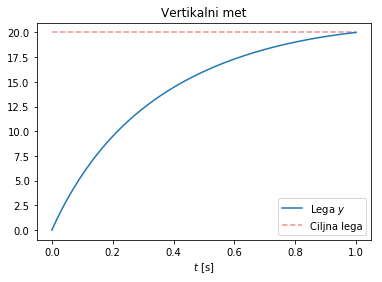

In [9]:
plt.title('Vertikalni met')
plt.hlines(20,0., 1, 'C3', linestyles='dashed', label='Ciljna lega', alpha=0.5)
plt.plot(t, y_vert[:,0], label='Lega $y$')
plt.xlabel('$t$ [s]')
plt.legend(loc=4)
plt.show()

### Poševni met

Poglejmo si sedaj bolj splošen primer poševnega meta, ko je naklon definiran s hitrostjo:

$$\tan(\varphi)=\frac{\dot{y}}{\dot{x}}$$

Zanima nas rešitev, ko izstrelek izstrelimo iz višine $x=y=0\,$m in mora pri času $t=b=1\,$s biti na razdalji $x(b)=50\,$m in višini $y(b)=20\,$m. Definirali smo robni problem:


$$\ddot x(t)=-F\,\cos(\varphi)/m\qquad\ddot y(t)=-F\,\sin(\varphi)/m-g,$$

$$x(0)=y(0)=0,\quad x(1)=50, y(1)=20.$$

Najprej moramo sistem diferencialnih enačb drugega reda preoblikovati v sistem enačb prvega reda. 
Uporabimo:
$$y_0=x,~ y_1=\dot{x},~ y_2=y,~ y_3=\dot{y}$$

in dobimo sistem diferencialnih enačb prvega reda:
\begin{array}{rcl}
\dot y_0&=&y_1\\
\dot y_1&=&F\,\cos(\varphi)/m\\
\dot y_2&=&y_3\\
\dot y_3&=&-g-F\,\sin(\varphi)/m.\\
\end{array}

Pripravimo seznam funkcij prvega odvoda:

In [10]:
def f_poševno(t, y, g=9.81, m=1., c=0.5):
    v = np.sqrt(y[1]**2 + y[3]**2) # hitrost
    F = c*v**(3/2)
    varphi = np.arctan2(y[3], y[2])
    return np.array([y[1], F*np.cos(varphi)/m, y[3], -g-F*np.sin(varphi)/m])

er pripravimo funkcijo za izračun mejnega preostanka pri času $b$ v odvisnosti od vektorja začetne hitrosti $\mathbf{v}_0$:

In [11]:
def r_poševno(v0=[5., 100.], ciljna_lega=np.array([50, 20.]), b=1.0, g=9.81, m=1., c=0.5):
    y_ode = ode(f_poševno).set_integrator('dopri5').\
    set_initial_value([0, v0[0], 0, v0[1]]).set_f_params(g, m, c)
    r = ciljna_lega - y_ode.integrate(b)[0:3:2]
    return r

Preverimo mejni preostanek pri začetnem pogoju $\mathbf{v}_0=[5., 100.]\,$m/s:

In [12]:
r_poševno(v0=[5., 100.])

array([ 6.65768055, -3.81098348])

Za iskanje korena sistema nelinearnih funkcij smo že spoznali funkcijo ``scipy.optimize.root`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)):

```python
root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
```
Najprej jo uvozimo:

In [13]:
from scipy import optimize

In potem uporabimo z začetnim ugibanjem $\mathbf{v}_0$:

In [14]:
rešitev = optimize.root(r_poševno, np.array([5., 100.]))

Rešitev je:

In [15]:
rešitev

    fjac: array([[-0.9990064 ,  0.04456687],
       [-0.04456687, -0.9990064 ]])
     fun: array([  1.65485403e-11,   1.75504056e-12])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  5.00158131e-08,   7.55905340e-09])
       r: array([ 5.64395384,  0.7741996 ,  0.20580742])
  status: 1
 success: True
       x: array([  9.03999443,  84.37700754])

Preverimo mejni preostanek pri izračunani rešitvi:

In [16]:
r_poševno(v0=rešitev.x)

array([  1.65485403e-11,   1.75504056e-12])

Poglejmo si sedaj izračunano rešitev:

In [17]:
y_ode = ode(f_poševno).set_integrator('dopri5').\
    set_initial_value([0, rešitev.x[0], 0, rešitev.x[1]]).set_f_params(9.81, 1, 0.5)
y_poševni = np.array([y_ode.integrate(_, step=t[1]) for _ in t])

C:\Users\Domen\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


In prikažemo rezultat:

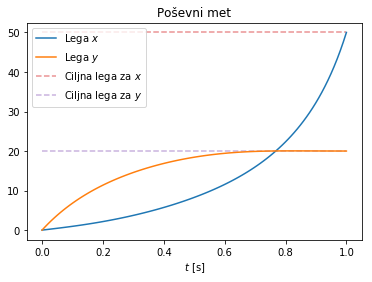

In [18]:
plt.title('Poševni met')
plt.hlines(50,0., 1, 'C3', linestyles='dashed', label='Ciljna lega za $x$', alpha=0.5)
plt.hlines(20,0., 1, 'C4', linestyles='dashed', label='Ciljna lega za $y$', alpha=0.5)
plt.plot(t, y_poševni[:,0], label='Lega $x$')
plt.plot(t, y_poševni[:,2], label='Lega $y$')
plt.xlabel('$t$ [s]')
plt.legend()
plt.show()

## Numerični zgled: nosilec z obremenitvijo

Poglejmo si nosilca:
<img src='./fig/nosilec.png' width=300>

Poves $w(x)$ popiše diferencialna enačba 4. reda:

$$-E\,I\frac{\textrm{d}^4}{\textrm{d}x^4}w(x)+q(x)=0.$$

Znane konstante so $E,I,l$ in je $q(x)$ porazdeljena obremenitev.

Robni pogoji (členkasto vpet nosilec):
$$w(0)=w(l)=0\quad\textrm{in}\quad w''(0)=w''(l)=0$$

Parametri so: 
* $I=2.1\cdot10^{-5}\,$m$^4$, 
* $E=2.1\cdot10^{11}\,N/$m$^2$, 
* $l=10\,$m. 

Porazdeljena obremenitev $q(x)$ bo definirana pozneje.

Najprej moramo sistem diferencialnih enačb drugega reda preoblikovati v sistem enačb prvega reda. 
Uporabimo:
$$y_0=w,~ y_1=w',~ y_2=w'',~ y_3=w'''$$

in dobimo sistem diferencialnih enačb prvega reda:
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
y_2'&=&y_3\\
y_3'&=&q(x)/(EI).\\
\end{array}

Pripravimo različne porazdeljene obremenitve:

In [19]:
def q_konstanta(x, F_0=1e3, l=10):
    return -F_0

def q_trikotna(x, F_0=1e3, l=10):
    return -F_0*x/l

def q_pol_sinusna(x, F_0=1e3, l=10):
    return -F_0*np.sin(np.pi*x/l)

Definirajmo parametre:

In [20]:
l = 10.
E = 2.1e11
I = 2.1e-5

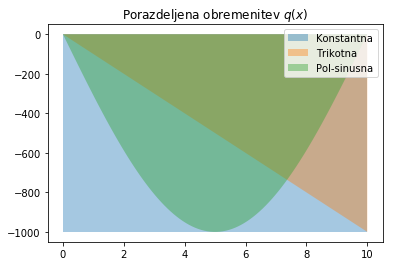

In [21]:
x = np.linspace(0, l, 100)
plt.fill_between(x, q_konstanta(x), alpha=0.4, label='Konstantna')
plt.fill_between(x, q_trikotna(x), alpha=0.4, label='Trikotna')
plt.fill_between(x, q_pol_sinusna(x), alpha=0.4, label='Pol-sinusna')
plt.title('Porazdeljena obremenitev $q(x)$')
plt.legend()
plt.show()

Pripravimo seznam funkcij prvega odvoda:

In [22]:
def f_nosilec(x, y, q, E=2.1e11, I=0.4):
    return np.array([y[1], y[2], y[3], q(x)/(E*I)])

In [23]:
y_ode = ode(f_nosilec).set_integrator('dopri5').\
set_initial_value([0, 0.1, 0, 1]).set_f_params(q_konstanta, E, I)
y_ode.integrate(l)

array([ 167.57218443,   50.06220711,    9.98866213,    0.99773243])

ter pripravimo funkcijo za izračun mejnega preostanka pri času $b$ v odvisnosti od vektorja začetne hitrosti $\mathbf{v}_0$:

In [24]:
def r_nosilec(y0=[1., 1.], q=q_konstanta, ciljne_vrednosti=np.array([0, 0.]), b=10, E=2.1e11, I=2.1e-5):
    y_ode = ode(f_nosilec).set_integrator('dopri5').\
    set_initial_value([0, y0[0], 0, y0[1]]).set_f_params(q, E, I)
    r = ciljne_vrednosti - y_ode.integrate(b)[0:3:2]
    return r

Za konstantno obremenitev preverimo mejni preostanek pri $w'(0)=1$ in $w'''(0)=1$:

In [25]:
r_nosilec(y0=[1., 1.], q=q_konstanta)

array([-176.57218443,   -9.98866213])

Rešimo sedaj sistem nelinearnih enačb s `scipy.optimize.root()`:

In [26]:
rešitev = optimize.root(r_nosilec, np.array([0., 0.]), args=(q_konstanta))

Rešitev je:

In [27]:
rešitev.x

array([-0.00944822,  0.00113379])

In mejni preostanek pri najdeni rešitvi:

In [28]:
r_nosilec(rešitev.x)

array([  1.07552856e-16,   4.33680869e-19])

Pripravimo sedaj še izračun rezultatov pri najdenih začetnih pogojih:

In [29]:
y_ode = ode(f_nosilec).set_integrator('dopri5').\
set_initial_value([0, rešitev.x[0], 0, rešitev.x[1]]).set_f_params(q_konstanta, E, I)
y = np.array([y_ode.integrate(_, step=x[1]) for _ in x])

C:\Users\Domen\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


In rezultat prikažimo:

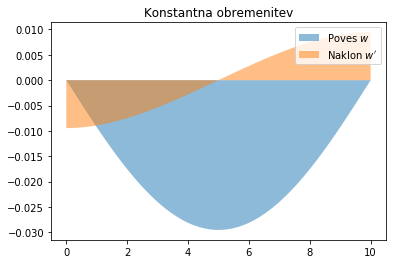

In [30]:
plt.fill_between(x, y[:,0], label='Poves $w$', alpha=0.5)
plt.fill_between(x, y[:,1], label='Naklon $w\'$', alpha=0.5)
plt.title('Konstantna obremenitev')
plt.legend()
plt.show()

### Polsinusna obremenitev

Poglemo še rešitev za polsinusno obremenitev. V zgoraj zapisani kodi moramo dvakrat zamenjati samo funkcijo obremenitve: namesto `q_konstantna` uporabimo `q_pol_sinusna`:

In [31]:
rešitev = optimize.root(r_nosilec, np.array([0., 0.]), args=(q_pol_sinusna))
y_ode = ode(f_nosilec).set_integrator('dopri5').\
set_initial_value([0, rešitev.x[0], 0, rešitev.x[1]]).set_f_params(q_pol_sinusna, E, I)
y_pol_sin = np.array([y_ode.integrate(_, step=x[1]) for _ in x])

C:\Users\Domen\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


In prikažemo rezultat:

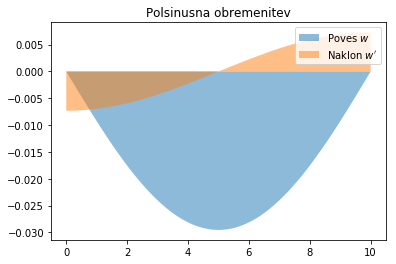

In [32]:
plt.fill_between(x, y[:,0], label='Poves $w$', alpha=0.5)
plt.fill_between(x, y_pol_sin[:,1], label='Naklon $w\'$', alpha=0.5)
plt.title('Polsinusna obremenitev')
plt.legend()
plt.show()

# Metoda končnih razlik

Pri metodi končnih razlik za reševanje robnega problema uporabimo diferenčno shemo končnih razlik. Predpostavimo, da imamo interval na katerem rešujemo diferencialno enačbo (neodvisna spremenljivka) razdeljeno na $n$ ekvidistantnih točk:

$$t=[t_0, t_1,\dots, t_{n-1}]$$

in rešujemo robni problem:

$$\ddot y=f(t, y, \dot y),\qquad y(a)=\alpha,\quad y(b)=\beta.$$

Velja torej: $$a=t_0,\quad b=t_{n-1}.$$

Odvode nadomestimo z centralno diferenčno shemo:

|       |$\mbox{$f(x-2h)$}$|$\mbox{$f(x-h)$}$ |$\mbox{$\quad f(x)\quad$}$   |$\mbox{$f(x+h)$}$ |$\mbox{$f(x+2h)$}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$\mbox{$f'(x)=\frac{1}{h}\cdot$}$| 0     | -0.5 | 0 | 0.5 | 0|
|$\mbox{$f''(x)=\frac{1}{h^2}\cdot$}$| 0 | 1 | -2 | 1 | 0|
|$\mbox{$f'''(x)=\frac{1}{h^3}\cdot$}$| -0.5 | 1 | 0 | -1 | 0.5|
|$\mbox{$f^{(4)}(x)=\frac{1}{h^4}\cdot$}$| 1 | -4 | 6 | -4 | 1|

Prikazana centralna diferenčna shema ima napako 2. reda $\mathcal{O}(h^{2})$.

Za $i$-to točko lahko navadno differencialno enačbo drugega reda s centralno diferenčno shemo zapišemo kot:

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)+\mathcal{O}(h^{2})=f\left(t_i, y_i, 
\frac{1}{2h}\left(y_{i-1}+y_{i+1}\right)+\mathcal{O}(h^{2})\right).$$

Če odstranimo člena za napako:

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)=f\left(t_i, y_i, 
\frac{1}{2h}\left(y_{i-1}+y_{i+1}\right)\right).$$

Zgornjo enačbo lahko zapišemo za $n-2$ notranjih točk, kar pomeni, da nam do rešljivega sistema enačb manjkata še dve enačbi. Ti dve enačbi sta robna pogoja:

$$y_0=\alpha,\quad y_{n-1}=\beta.$$

V primeru linearnega robnega problema moramo za izračun $n$ neznank $y_i$ rešiti sistem $n$ linearnih enačb.

### Ocena napake

Točen rezultat $y(t_{i})$ pri velikosti koraka $h$ je:

$$y(t_{i})=y_{i,h}+E_{i,h},$$
kjer je $y_{i,h}$ numerični približek in $E_h$ napaka metode. Ker je globalna napaka drugega reda, lahko napako definiramo kot:

$$E_{i,h}=k\,h^2,$$

Podobno lahko za velikost koraka $2h$ definiramo:

$$y(t_{j})=y_{j,2h}+E_{j,2h},$$
kjer je $y_{j,2h}$ numerični približek in $E_{2h}$ napaka metode:

$$E_{j,2h}=k\,(2\,h)^2=4\,k\,h^2$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko določimo oceno napake pri boljšem približku $E_h$. Najprej izenačimo točna rezultat $y(t_{i})$ pri koraku $h$ in rezultat $y(t_{j})$ pri koraku $2h$ (velja $i=2\,j$, $j=1,2,\dots$):

$$y_{i,h}+k\,h^2=y_{j,2h}+4\,k\,h^2$$

sledi:

$$3\,k\,h^2=y_{2j,h}-y_{j,2h}$$

in nato določimo *oceno napake*:

$$E_{j,h}=\frac{y_{2j,h}-y_{j,2h}}{3}.$$

## Numerični zgled: vertikalni met

Zgoraj smo vertikalni met rešili s strelsko metodo; uporabimo sedaj metodo končnih razlik. Najprej moramo enačbo drugega reda:

$$\ddot y=f(t, y, \dot y) = -g-c\,\dot y/m$$

zapisati s pomočjo centralne diferenčne sheme:

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)= -g-c\,(-y_{i-1}+y_{i+1})/(2\,h\,m).$$

(Tukaj smo predpostavili, da je zračni upor linearno odvisen od hitrost. V nasprotnem primeru bi imeli nelinearni robni problem, in posledično razvili sistem nelinearnih enačb.)

Zgornji izraz preoblikujemo:

$$\left(y_{i-1}-2\,y_{i}+y_{i+1}\right) + c\,h/(2\,m)\,\left(-y_{i-1}+y_{i+1}\right)= -g\,h^2.$$

Robna pogoja sta:

$$y_0=0,\qquad y_{n-1}=20$$

Robni problem smo torej preoblikovali na sistem $n$ linearnih enačb. Pogljemo si sedaj konkreten izračun za $n=11$; najprej definirajmo konstante, časovni vektor `t` in korak `h`:

In [33]:
n = 11 # liho število
c = 0.5
m = 1.0
g = 9.81
t = np.linspace(0, 1, n)
h = t[1]

Nato nadaljujemo z izračunom tridiagonalne matrike koeficientov `A`. 

Pomagamo si s funkcijo `numpy.diag` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html)):

```python
numpy.diag(v, k=0)
```
s parametroma:

* `v` vektor, ki bo prirejen diagonali
* `k` diagonala, kateri se priredi `v`. `k=0` uporabimo za glavno diagonalo, `k<0` oz. `k>0` uporabimo za  diagonale pod oz. nad nad glavno diagonalo.

In [34]:
A = np.diag(-2*np.ones(n), 0) + \
    (1-c*h/(2*m))*np.diag(np.ones(n-1), -1) + \
    (1+c*h/(2*m))*np.diag(np.ones(n-1), 1)
A[:4,:4]

array([[-2.   ,  1.025,  0.   ,  0.   ],
       [ 0.975, -2.   ,  1.025,  0.   ],
       [ 0.   ,  0.975, -2.   ,  1.025],
       [ 0.   ,  0.   ,  0.975, -2.   ]])

Definirajmo še vektor konstant:

In [35]:
b = -g*h**2 * np.ones(n)

Sedaj *popravimo* matriko koeficientov `A` in vektor konstant `b`, da zadostimo robnim pogojem:

$$y_0=0,\quad y_{n-1}=20.$$

In [36]:
A[0,0] = 1
A[0,1] = 0
A[-1,-1] = 1
A[-1,-2] = 0

In [37]:
b[0] = 0.
b[-1] = 20.

In rešimo sistem linearnih enačb:

In [38]:
y_mkr = np.linalg.solve(A, b)

Ter prikažemo rezultat:

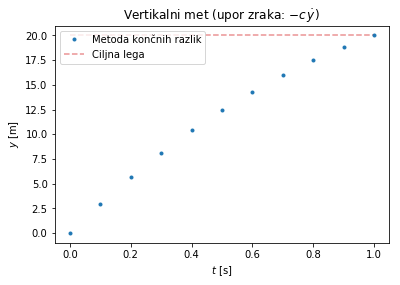

In [39]:
plt.title('Vertikalni met (upor zraka: $-c\,\dot y$)')
plt.hlines(20, 0, 1, 'C3', label='Ciljna lega', linestyles='dashed', alpha=0.5)
plt.plot(t, y_mkr, '.', label='Metoda končnih razlik')
plt.xlabel('$t$ [s]')
plt.ylabel('$y$ [m]')
plt.legend()
plt.show()

S pomočjo funkcije [`numpy.gradient()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html) izračunamo še hitrost in pospešek:

In [40]:
v_mkr = np.gradient(y_mkr,h, edge_order=2)
a_mkr = np.gradient(v_mkr,h, edge_order=2)
v_mkr[:4]

array([ 30.68896632,  28.29330125,  25.95606705,  23.73284426])

Izračunajmo sedaj še rezultat z dvojnim korakom:

In [41]:
n2h = n//2+1
t2h = np.linspace(0, 1, n2h)
h2h = t[1]
A2h = np.diag(-2*np.ones(n2h), 0) + \
    (1-c*h2h/(2*m))*np.diag(np.ones(n2h-1), -1) + \
    (1+c*h2h/(2*m))*np.diag(np.ones(n2h-1), 1)
b2h = -g*h2h**2 * np.ones(n2h)
A2h[0,0] = 1
A2h[0,1] = 0
A2h[-1,-1] = 1
A2h[-1,-2] = 0
b2h[0] = 0.
b2h[-1] = 20.
y2h_mkr = np.linalg.solve(A2h, b2h)

Primerjajmo prvih šest rezultatov pri koraku $2h$:

In [42]:
y2h_mkr[:6]

array([ -0.        ,   4.61071605,   8.9008118 ,  12.88592727,
        16.58093954,  20.        ])

z vsakim drugim rezultatom pri koraku $h$:

In [43]:
y_mkr[:12:2]

array([  0.        ,   5.65866025,  10.4052291 ,  14.32652073,
        17.50108621,  20.        ])

Sedaj lahko ocenimo napako:

In [44]:
(y_mkr[::2]-y2h_mkr)/3

array([ 0.        ,  0.34931474,  0.50147244,  0.48019782,  0.30671555,  0.        ])

## Numerični zgled: nosilec z obremenitvijo

Vrnimo se k robnemu problemu nosilca s polsinusno obremenitvijo ($q(x)=-F_0\,\sin(\pi\,x/l))$), ki smo ga že obravnavali s strelsko metodo. 

Diferencialno enačbo četrtega reda zapišemo s pomočjo centralne diferenčne sheme (za $i$-to točko):

$$-\frac{E\,I}{h^4}\left(1\,w_{i-2} - 4\,w_{i-1} + 6\,w_{i} - 4\,w_{i+1} + 1\, w_{i+2}\right) - F_0\,\sin(\pi\,x_i/l)= 0.$$

Robni pogoji so štirje, najprej poves na robovih: 

$$w_0=w_{n-1}=0$$

Ker na robovih ni momenta je drugi odvod nič. S centralno diferenčno shemo torej zapišemo dodatne enačbe: 

$$w_{-1}-2\,w_{0}+w_{1}=0\qquad w_{n-2}-2\,w_{n-1}+w_{n}=0.$$

Če za neodvisno spremenljivko $x$ uporabimo $n$ ekvidistantnih točk, potem diferencialno enačbo 4. reda zapišemo za $n-2$ notranje točke. S tem pridobimo dodatni nefizikalni točki $w_{-1}$ in $w_n$. Če dodamo še štiri robne pogoje imamo rešljiv sistem linearnih enačb z $n+2$ neznakami in $n+2$ enačbami.

Najprej pripravimo podatke, neodvisno spremenljivko `x` in korak `h`:

In [45]:
l = 10.
E = 2.1e11
I = 2.1e-5
F_0= 1e3
n = 100
x = np.linspace(0, l, n)
h = x[1]

Nato pripravimo matriko koeficientov (matrika je dimenzije `(n+2, n+2)`:

In [46]:
A = +1*np.diag(np.ones(n-2+2), -2) \
    -4*np.diag(np.ones(n-1+2), -1) \
    +6*np.diag(np.ones(n+2), 0)  \
    -4*np.diag(np.ones(n-1+2), +1)  \
    +1*np.diag(np.ones(n-2+2), +2)
A[:4,:4]

array([[ 6., -4.,  1.,  0.],
       [-4.,  6., -4.,  1.],
       [ 1., -4.,  6., -4.],
       [ 0.,  1., -4.,  6.]])

Definirajmo še vektor konstant (dodamo en element na koncu in en na začetku):

In [47]:
b = np.zeros(n+2)
b[1:-1] = - h**4 * F_0*np.sin(np.pi*x/l)/(E*I)
b[:4]

array([  0.00000000e+00,  -0.00000000e+00,  -7.48966545e-10,
        -1.49717894e-09])

Sedaj *popravimo* matriko koeficientov `A` in vektor konstant `b`, da zadostimo
robnim pogojem. 

Najprej $w_0=w_{n-1}=0$:

In [48]:
A[0,:3]= np.array([0, 1, 0])
b[0] = 0
A[-1,-3:]= np.array([0, 1, 0])
b[-1] = 0

Nato $w_{-1}-2\,w_{0}+w_{1}=0$ in $w_{n-2}-2\,w_{n-1}+w_{n}=0$:

In [49]:
A[1,:4] = np.array([1, -2, 1,0])
b[1] = 0
A[-2,-4:] = np.array([0, 1, -2, 1])
b[-2] = 0

In [50]:
A[:5,:5]

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  1., -4.,  6.]])

In [51]:
A[-5:,-5:]

array([[ 6., -4.,  1.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [52]:
b[:5]

array([  0.00000000e+00,   0.00000000e+00,  -7.48966545e-10,
        -1.49717894e-09,  -2.24388381e-09])

In [53]:
b[-5:]

array([ -2.24388381e-09,  -1.49717894e-09,  -7.48966545e-10,
         0.00000000e+00,   0.00000000e+00])

In rešimo sistem linearnih enačb:

In [54]:
y_mkr = np.linalg.solve(A, b)

Ter prikažemo rezultat:

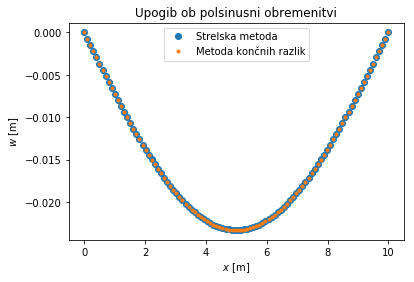

In [55]:
plt.title('Upogib ob polsinusni obremenitvi')
plt.plot(x, y_pol_sin[:,0], 'o', label='Strelska metoda')
plt.plot(x, y_mkr[1:-1], '.', label='Metoda končnih razlik')
plt.xlabel('$x$ [m]')
plt.ylabel('$w$ [m]')
plt.legend()
plt.show()

# Dodatno: simbolna rešitev nosilca

Tukaj si bomo pogledali simbolno reševanje robnega problema. Poudariti je treba, da gre tukaj zgolj za zgled, ki ga lahko naredimo za obravnavani nosilec z relativno enostavno polsinusno obremenitvijo. **V praksi so seveda obremenitve in tudi oblike nosilca lahko bistveno bolj zahtevne in takrat druge poti kot numeričnega reševanja skoraj nimamo na voljo.**

Najprej uvozimo `sympy`:

In [56]:
import sympy as sym
sym.init_printing()

In definirajmo spremenljivke:

In [57]:
w, x, E, I, F_0, l = sym.symbols('w, x, E, I, F_0, l')

Ter differencialno enačbo (robne pogoje dodamo pozneje):

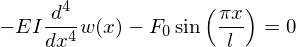

In [58]:
eq = sym.Eq(-E*I*w(x).diff(x,4)-F_0*sym.sin(sym.pi*x/l))
eq

Rešimo:

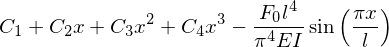

In [59]:
sol = sym.dsolve(eq).args[1]
sol

Iz vrednosti rešitve pri $x=0$:

In [60]:
sol.subs(x, 0)

in drugega odvoda rešitve pri $x=0$:

In [61]:
sol.diff(x, 2).subs(x, 0)

določimo konstanti `C1` in `C3` (pomik in moment na levi strani sta enaka nič): 

In [62]:
c1c3 = {'C1': 0, 'C3': 0}

Robni pogoji na desni strani ($x=l$):

In [63]:
eq1 = sol.subs(c1c3).subs(x, l)
eq1

Ker na desni strani ni pomika, sledi rešitev za konstanto `C2`:

In [64]:
C2 = sym.solve(eq1, 'C2')[0]
C2

Ker ni momenta, sledi še:

In [65]:
eq2 = sol.diff(x, 2).subs(c1c3).subs(x, l)
eq2

Določimo konstanto `C4`:

In [66]:
C4 = sym.solve(
      eq2.subs('C2', C2),
      'C4'
     )[0]
C4

Upoštevajoč izračunane konstante je rešitev:

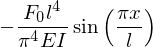

In [67]:
resitev = sol.subs(c1c3).subs('C2', C2).subs('C4', C4)
resitev

Pripravimo še numerično funkcijo `resitev_np()`:

In [68]:
podatki = {E: 2.1e11, I: 2.1e-5, l: 10, F_0:1e3}
resitev_np = sym.lambdify(x, resitev.subs(podatki), modules='numpy')
x_ana = np.linspace(0, podatki[l], 100)
y_ana = resitev_np(x_ana)

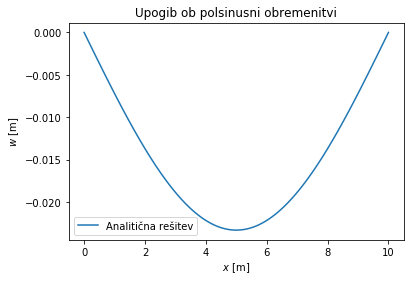

In [69]:
plt.title('Upogib ob polsinusni obremenitvi')
plt.plot(x_ana, y_ana, '-', label='Analitična rešitev')
plt.xlabel('$x$ [m]')
plt.ylabel('$w$ [m]')
plt.legend()
plt.show()

Primerjajmo sedaj analitično rešitev, z rešitivijo z metodo končnih razlik in strelsko metodo:

In [70]:
[np.min(y_ana), np.min(y_mkr), np.min(y_pol_sin)]